In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
train_dataset_path = '/content/drive/MyDrive/Poribohon-BD/train/'
validation_dataset_path = '/content/drive/MyDrive/Poribohon-BD/validation/'

In [3]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 7271 images belonging to 16 classes.


In [5]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 873 images belonging to 16 classes.


In [6]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bicycle
1 : Bike
2 : Boat
3 : Bus
4 : Car
5 : Cng
6 : Easy-bike
7 : Horse-cart
8 : Launch
9 : Leguna
10 : Multi-class Vehicles
11 : Rickshaw
12 : Tractor
13 : Truck
14 : Van
15 : Wheelbarrow


In [7]:
image_size = [150,150]
vgg_16 = tf.keras.applications.VGG16(input_shape = image_size+[3],weights='imagenet',include_top = False)
vgg_16.output
for layer in vgg_16.layers :
  layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [8]:
x = Flatten()(vgg_16.output)
prediction = Dense(16,activation="softmax")(x)
model = Model(inputs=vgg_16.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
epoch = 10
history = model.fit(train_generator,
                    steps_per_epoch = None,
                    epochs = epoch,
                    validation_data = validation_generator,
                    validation_steps = None
                    )

Epoch 1/10
 78/228 [=========>....................] - ETA: 54:19 - loss: 1.7802 - accuracy: 0.4496

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


228/228 [==============================] - 5632s 25s/step - loss: 1.4033 - accuracy: 0.5604 - val_loss: 1.2715 - val_accuracy: 0.6128
Epoch 2/10
228/228 [==============================] - 623s 3s/step - loss: 0.7710 - accuracy: 0.7578 - val_loss: 1.3125 - val_accuracy: 0.6334
Epoch 3/10
228/228 [==============================] - 616s 3s/step - loss: 0.5506 - accuracy: 0.8339 - val_loss: 1.4575 - val_accuracy: 0.6254
Epoch 4/10
228/228 [==============================] - 620s 3s/step - loss: 0.4162 - accuracy: 0.8887 - val_loss: 1.3269 - val_accuracy: 0.6392
Epoch 5/10
228/228 [==============================] - 627s 3s/step - loss: 0.3276 - accuracy: 0.9173 - val_loss: 1.3333 - val_accuracy: 0.6495
Epoch 6/10
228/228 [==============================] - 630s 3s/step - loss: 0.2569 - accuracy: 0.9448 - val_loss: 1.4667 - val_accuracy: 0.6312
Epoch 7/10
228/228 [==============================] - 621s 3s/step - loss: 0.2156 - accuracy: 0.9590 - val_loss: 1.4168 - val_accuracy: 0.6323
Epoch 8/

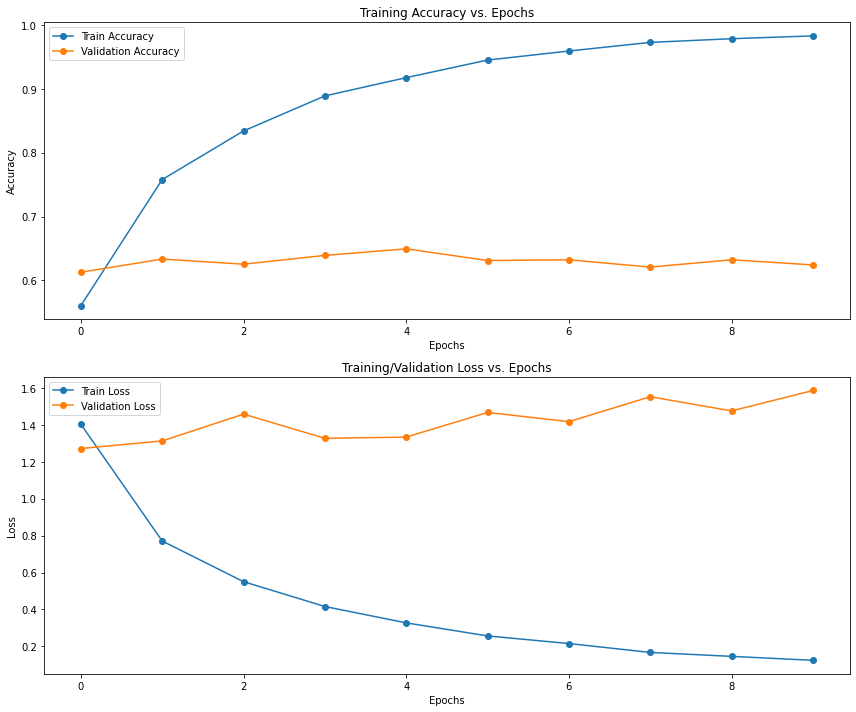

In [11]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [12]:
test_dataset = '/content/drive/MyDrive/Poribohon-BD/test/'

In [13]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 910 images belonging to 16 classes.


In [14]:
predictions = model.predict(test_generator)

In [15]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

29/29 [==============================] - 38s 1s/step - loss: 0.9995 - accuracy: 0.7099
Test Loss:     0.9995427131652832
Test Accuracy: 0.7098901271820068


In [16]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

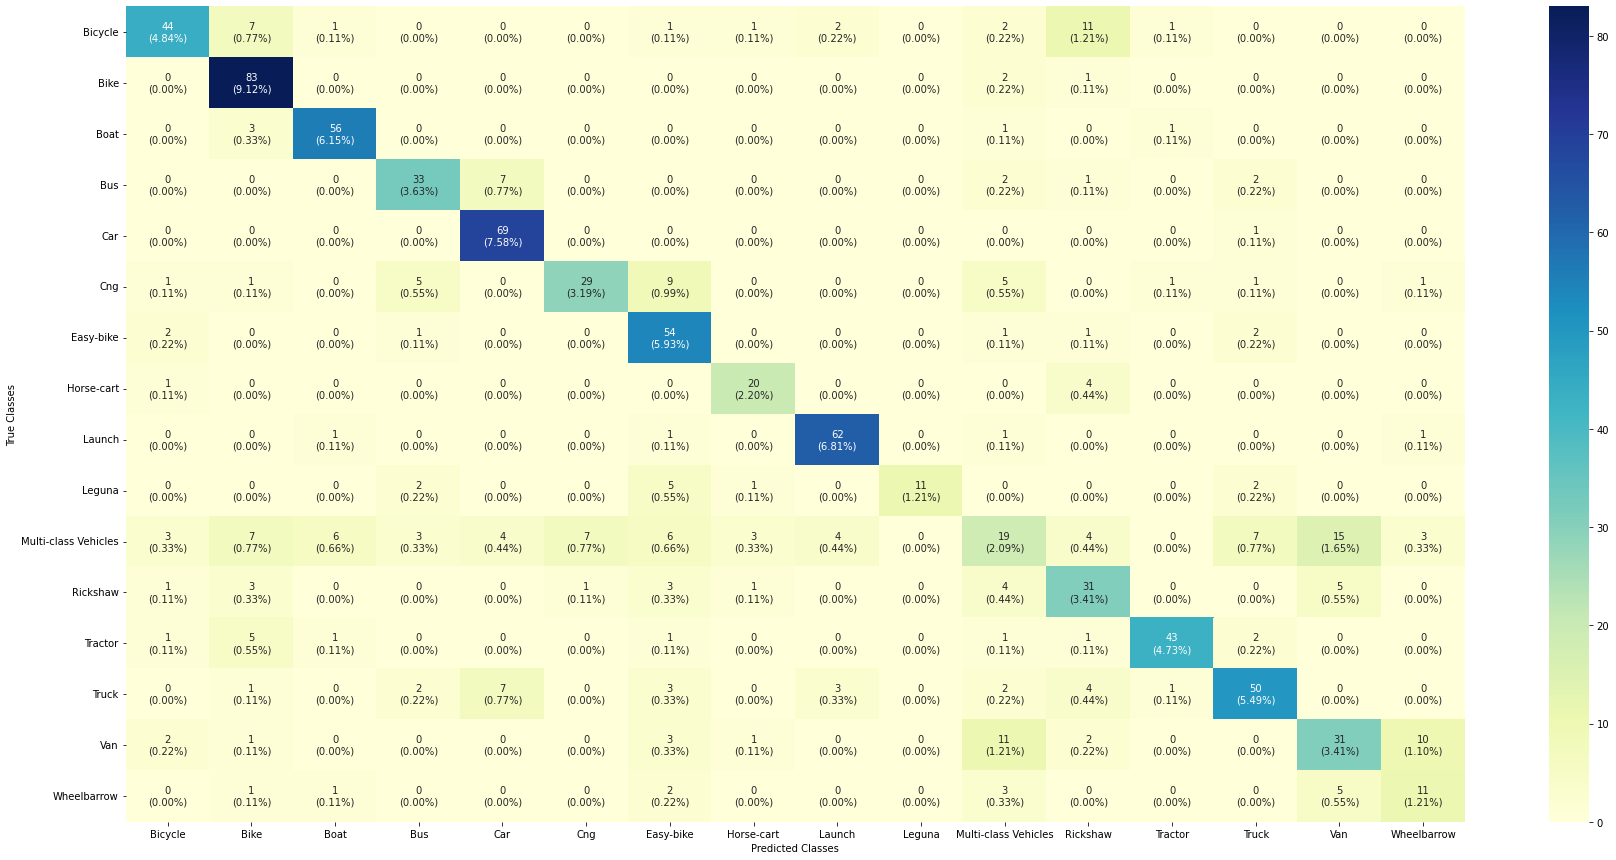

In [17]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(16, 16)

plt.figure(figsize = (30, 15))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [18]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

                      precision    recall  f1-score   support

             Bicycle       0.80      0.63      0.70        70
                Bike       0.74      0.97      0.84        86
                Boat       0.85      0.92      0.88        61
                 Bus       0.72      0.73      0.73        45
                 Car       0.79      0.99      0.88        70
                 Cng       0.78      0.55      0.64        53
           Easy-bike       0.61      0.89      0.72        61
          Horse-cart       0.74      0.80      0.77        25
              Launch       0.87      0.94      0.91        66
              Leguna       1.00      0.52      0.69        21
Multi-class Vehicles       0.35      0.21      0.26        91
            Rickshaw       0.52      0.63      0.57        49
             Tractor       0.91      0.78      0.84        55
               Truck       0.75      0.68      0.71        73
                 Van       0.55      0.51      0.53        61
       